In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def condensate_belowdew(Bg, Bo, Rs, Rv, p, cw, cf, sw, We, Bw, Wp, Wi, Np, Gp, Gi):
  "Condensate reservoir material balance below dewpoint"
  Rsi, Rvi = Rs[0], Rv[0]
  Bgi, pi = Bg[0], p[0]
  deltaP = p - pi

  Btg = ((Bg * (1 - (Rs * Rvi))) + (Bo * (Rvi - Rv))) / (1 - (Rv * Rs))
  Bto = ((Bo * (1 - (Rv * Rsi))) + (Bg * (Rsi - Rs))) / (1 - (Rv * Rs))
  Eg = Btg - Bgi
  Efw = ((cf + (cw * sw)) / (1 - sw)) * deltaP
  deltaW = We - (Bw * (Wp - Wi))
  F = (Np * ((Bo - (Rs * Bg)) / (1 - (Rv * Rs)))) + ((Gp - Gi) * ((Bg - (Rv * Bo)) / (1 - (Rv * Rs))))
  return(F)

def condensate_abovedew(Bg, Rv, p, cw, cf, sw, We, Bw, Wp, Wi, Np, Gp, Gi):
  "Condensate reservoir material balance above dewpoint"
  Rvi = Rv[0]
  Rs = 1 / Rvi # theoretical
  Bo = Bg * Rs # theoretical

  Bgi, pi = Bg[0], p[0]
  deltaP = p - pi

  Eg = Bg - Bgi
  Efw = ((cf + (cw * sw)) / (1 - sw)) * deltaP
  deltaW = We - (Bw * (Wp - Wi))
  F = Bg * (Gp - Gi)
  return(F)

In [3]:
P_dew = 3428 # dewpoint pressure, psia

p = np.array([3558, 3428, 3000, 2400, 1800, 1200, 700]) # psia
Np = np.array([0, 410, 1160, 2520, 3930, 5060, 6150]) * 1000 # STB
Gp = np.array([0, 2.8, 9.4, 20, 35, 49, 60]) * 1E+09 # scf
Wp = np.array([0, 0, 0, 0, 0, 0, 0]) # STB
Bg = np.array([.74311, .7722, .82457, .97304, 1.30459, 1.99091, 3.54322]) # RB/Mscf
Bg = Bg * 1E-3 # convert RB/Mscf to RB/scf
Bo = np.array([np.nan, 1.76766, 1.65259, 1.54709, 1.3605, 1.1914, 1.07162]) # RB/stb
Rs = np.array([np.nan, 2155.55, 1555.46, 1020.55, 637.632, 290.637, 107.997]) # scf/STB
Rv = np.array([148, 148, 87.5105, 50.2976, 33.4408, 27.4227, 29.5971]) # STB/MMscf
Rv = Rv * 1E-6 # convert STB/MMscf to STB/scf

# reservoir state relative to dewpoint
states = []
for i in range(len(p)):
  if p[i] > P_dew:
    state = 'above dew'
  else:
    state = 'below dew'
  states.append(state)

data = pd.DataFrame({'p': p, 'Np': Np, 'Gp': Gp, 'Wp': Wp, 'Bg': Bg, 'Bo': Bo, 'Rs': Rs, 'Rv': Rv, 'State': states})
print('Table Data')
data

Table Data


p       Np            Gp  Wp        Bg       Bo        Rs        Rv  \
0  3558        0  0.000000e+00   0  0.000743      NaN       NaN  0.000148   
1  3428   410000  2.800000e+09   0  0.000772  1.76766  2155.550  0.000148   
2  3000  1160000  9.400000e+09   0  0.000825  1.65259  1555.460  0.000088   
3  2400  2520000  2.000000e+10   0  0.000973  1.54709  1020.550  0.000050   
4  1800  3930000  3.500000e+10   0  0.001305  1.36050   637.632  0.000033   
5  1200  5060000  4.900000e+10   0  0.001991  1.19140   290.637  0.000027   
6   700  6150000  6.000000e+10   0  0.003543  1.07162   107.997  0.000030   

       State  
0  above dew  
1  below dew  
2  below dew  
3  below dew  
4  below dew  
5  below dew  
6  below dew

In [4]:
Rsi = 1 / Rv[0]
Boi = Bg[0] * Rsi

# change NaN value of Rs[0] and Bo[0] with the calculated Rsi, Boi
Rs[0] = Rsi
Bo[0] = Boi

data = pd.DataFrame({'p': p, 'Np': Np, 'Gp': Gp, 'Wp': Wp, 'Bg': Bg, 'Bo': Bo, 'Rs': Rs, 'Rv': Rv, 'State': states})
print('Table Data with Calculated Rsi and Boi')
data

Table Data with Calculated Rsi and Boi


p       Np            Gp  Wp        Bg        Bo           Rs        Rv  \
0  3558        0  0.000000e+00   0  0.000743  5.021014  6756.756757  0.000148   
1  3428   410000  2.800000e+09   0  0.000772  1.767660  2155.550000  0.000148   
2  3000  1160000  9.400000e+09   0  0.000825  1.652590  1555.460000  0.000088   
3  2400  2520000  2.000000e+10   0  0.000973  1.547090  1020.550000  0.000050   
4  1800  3930000  3.500000e+10   0  0.001305  1.360500   637.632000  0.000033   
5  1200  5060000  4.900000e+10   0  0.001991  1.191400   290.637000  0.000027   
6   700  6150000  6.000000e+10   0  0.003543  1.071620   107.997000  0.000030   

       State  
0  above dew  
1  below dew  
2  below dew  
3  below dew  
4  below dew  
5  below dew  
6  below dew

In [5]:

Rsi, Rvi = Rs[0], Rv[0] # from Equation 10.8, Rsi=1/Rvi

Btg = ((Bg * (1 - (Rs * Rvi))) + (Bo * (Rvi - Rv))) / (1 - (Rv * Rs)) # in RB/STB
Bto = ((Bo * (1 - (Rv * Rsi))) + (Bg * (Rsi - Rs))) / (1 - (Rv * Rs)) # in RB/scf

Gi = 0
F = (Np * ((Bo - (Rs * Bg)) / (1 - (Rv * Rs)))) + ((Gp - Gi) * ((Bg - (Rv * Bo)) / (1 - (Rv * Rs))))
Eg = Btg - Bg[0] 

# create Table 10.2
param = pd.DataFrame({'p': p, 'Bto': Bto, 'Btg': Btg, 'F': F, 'Eg': Eg})
param

p        Bto       Btg             F        Eg
0  3558   5.021014  0.000743  0.000000e+00  0.000000
1  3428   5.217568  0.000772  2.161494e+06  0.000029
2  3000   5.746473  0.000850  7.895469e+06  0.000107
3  2400   6.960145  0.001030  2.034505e+07  0.000287
4  1800   9.232915  0.001366  4.715129e+07  0.000623
5  1200  13.955334  0.002065  9.985011e+07  0.001322
6   700  24.493627  0.003625  2.156165e+08  0.002882

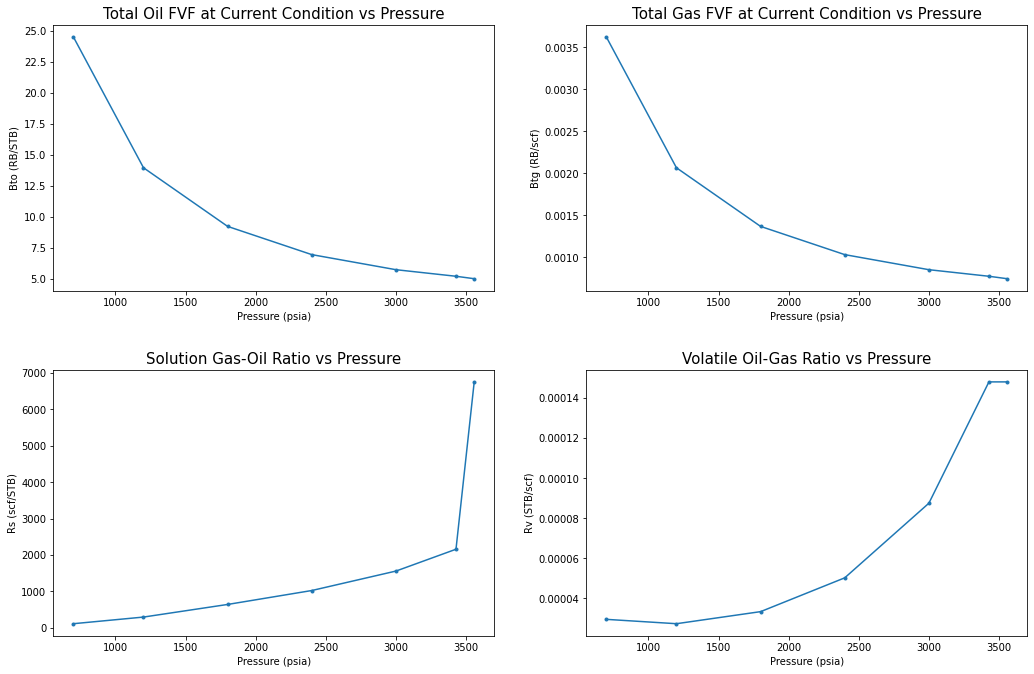

In [6]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(p, Bto, '.-')
plt.title('Total Oil FVF at Current Condition vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Bto (RB/STB)')

plt.subplot(2,2,2)
plt.plot(p, Btg, '.-')
plt.title('Total Gas FVF at Current Condition vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Btg (RB/scf)')

plt.subplot(2,2,3)
plt.plot(p, Rs, '.-')
plt.title('Solution Gas-Oil Ratio vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Rs (scf/STB)')

plt.subplot(2,2,4)
plt.plot(p, Rv, '.-')
plt.title('Volatile Oil-Gas Ratio vs Pressure', size=15)
plt.xlabel('Pressure (psia)'); plt.ylabel('Rv (STB/scf)')

plt.tight_layout(pad=3.0)
plt.show()